### The exponential function $e^x$
<br>$$e^x = \sum_{k=0}^{\infty} \frac{x^k}{k!} = 1 + x + \frac{x^2}{2!} + \frac{x^3}{3!} + \dots$$ 

In the exponential funciton there is a factorial in every term. Python provides a math.factorial(x) function that calculates the factorial of x. This adds to one more case in optimization of the function.
<br>Following are the optimizations that I will be working on for this function.
![title](img/exp001.png)


<p> In the end I will put these optimizations together to see how it affects the efficiency and accuracy. 

***

#### Finding the terminating condition
<p>To write a niave implementation I first need to find a terminating condition.
<p>The following graph shows the terms in $e^{0.1}$, $e^2$, $e^3$, $e^4$

In [34]:
#The utils file contains all the generic functions required for testing, finding computation time and plotting various graphs
import utils
import numpy as np
import math
import matplotlib.pyplot as plt
import statistics
import timeit
import copy
plt.style.use('seaborn-darkgrid')

In [35]:
def terms_exp(x, i):
    return x**i/math.factorial(i)

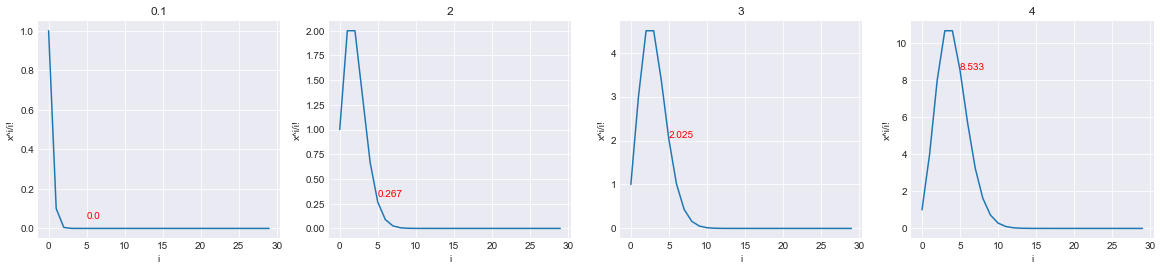

In [36]:
utils.plot_term([0.1, 2, 3, 4], terms_exp, "x^i/i!")

In the exponential function the terms go as $1 + x + \frac{x^2}{2!}$. We've seen in geometric series that for $|x| < 1$ the series converges as the power increases. In case of $x > 0$, the terms will increase as the power increases but there is division by factorial which brings the series down to zero. That is why in the first plot of $x = 0.1$ the series just converges whereas in the other 3 plots it increases to a certain value and then goes on decreasing. This is because the denominator increases at a greater rate than the numerator. Also note that as the value of $x$ is increasing the series converging slowly.
<br>After a certain number of iterations the terms don't change in value which means that they don't add anything to the sum. Therefore I will terminate the loop once the value of the sum stops changing. 

In [37]:
def exp_naive(x):
    s = 1
    t = 1
    t1 = 1
    t2 = 0
    float(t) 
    i  = 1 
    while t2 != t1:
        t = float(x**i/math.factorial(i))
        s += t
        i += 1
        t2 = t1 
        t1 = s
    return s,i

I need to check this for correctness.

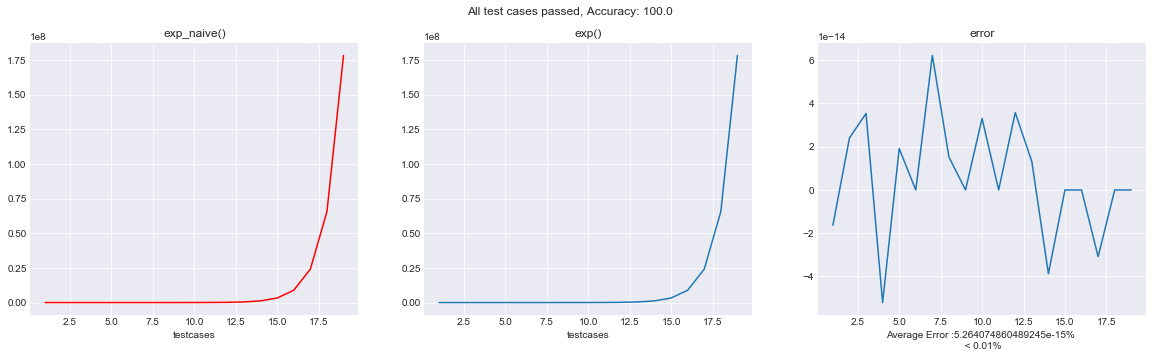

In [38]:
utils.theSeenAndTheUnseenTest(exp_naive, math.exp, np.linspace(1, 20, num = 19, endpoint = False))

In [39]:
expnaive_time = utils.find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_naive)

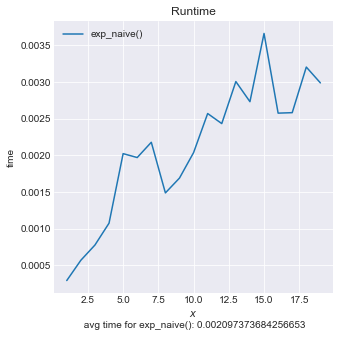

In [40]:
utils.plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, first = (expnaive_time, exp_naive))

The runtime is a function of x, as x increases the runtime increases. The ```plot_term()``` graph also showed that as the value is $x$ increases the series converges slowly. This implies that the iterations are high for higher values of $x$.
<p>

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup |
|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| -|
| Iterations | $100\mu s$ | $100\times$|
| Calculating Power | $5.9 ms$ | $2\times$|
|All optimzations| $61 \mu s$|$200 \times$|

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

## Case 1


![title](img/gpiter.png)

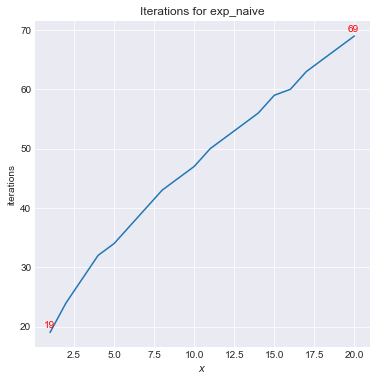

In [41]:
utils.plot_iterations(np.linspace(1, 20, 20, endpoint = True), exp_naive)

For geometric series the number of iterations were reduced by terminating once the error was below 0.01%. I will use the same case for exponential function.

In [42]:
def exp_iterations(x):
    '''
    exponential function with iteration optimization
    '''
    e = 0
    i = 0 
    t = 1
    actual = math.exp(x)
    check = actual * (1  - 0.0001)
    while e < check :
        e += x**i/math.factorial(i)
        i += 1
    return e, i


Testing it for correctness.

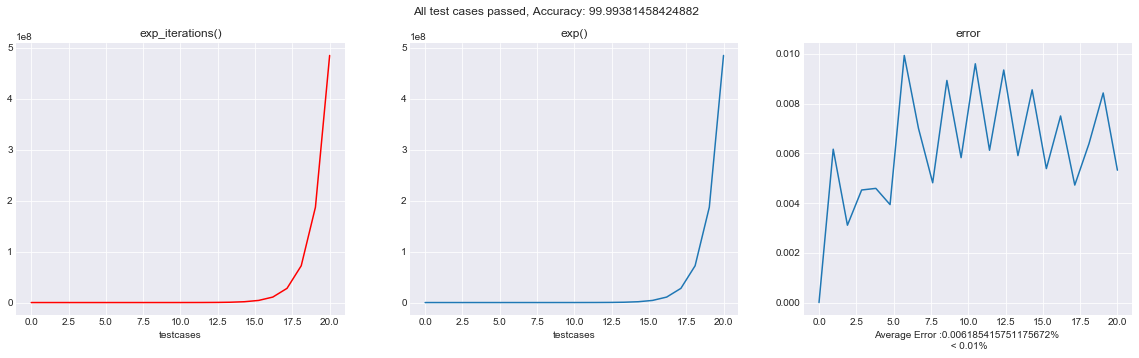

In [43]:
utils.theSeenAndTheUnseenTest(exp_iterations, math.exp, np.linspace(0, 20, num = 22, endpoint = True))

In [44]:
# Finding runtime for iteration optimization
expiterations_time = utils.find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_iterations)

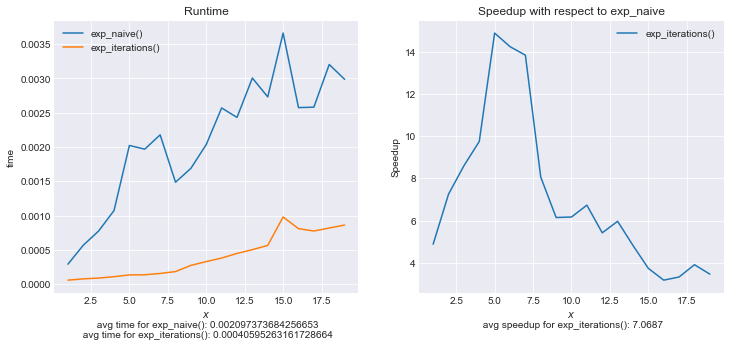

In [45]:
utils.plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expiterations_time, exp_iterations))

#### Optimizing the no.of iterations gives a speed up of $3\times$

Comparing the number of iterations taken by the naive approach and optimized function.

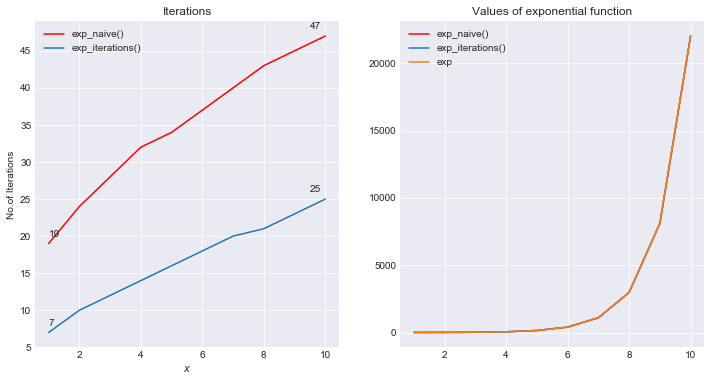

In [46]:
utils.compare_functions(exp_naive, exp_iterations, math.exp, "exponential function", np.linspace(1, 10, num = 10, endpoint = True))

#### The number of iterations are reduced to half

In the exponential function the number of iterations are converging a lot faster than those in the geometric progression. This is because there is division by factorial.

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup |
|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| -|
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$|
| Calculating Power | $5.9 ms$ | $2\times$|
|All optimzations| $61 \mu s$|$200 \times$|

***

## Case 2
![title](img/gpPow.png)

In [47]:
def exp_power(x):
    '''
    exp with power optimization
    '''
    e = 1
    t = 1
    term = 1
    i = 1 
    t1 = 1
    t2 = 0
    while t1 != t2:
        term = term*x
        t = term / math.factorial(i)
        e += t
        i = i + 1
        t2 = t1
        t1 = e
    return e, i

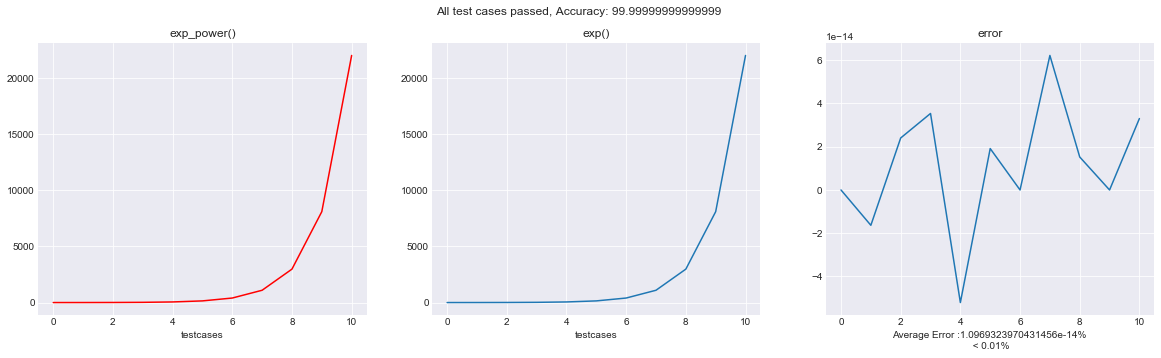

In [48]:
utils.theSeenAndTheUnseenTest(exp_power, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [49]:
# Runtime for exp_power
exppower_time = utils.find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_power)

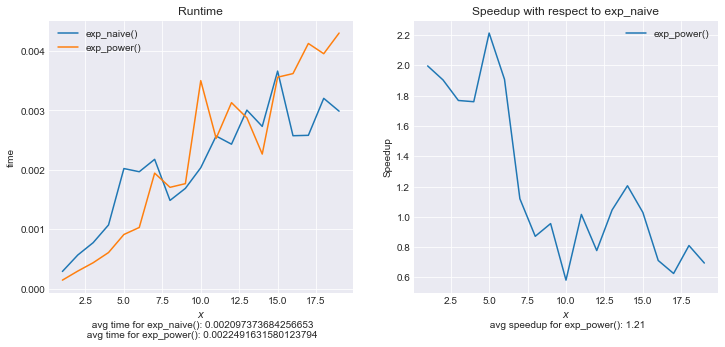

In [50]:
utils.plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (exppower_time, exp_power)         
         )

The power optimization alone gives no speedup, it is probably because of calculating the factorial term and then dividing the numerator.<br>
I can find the factorial in the same way as I am finding the power and see if it has any effect on runtime.
<p>

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup |
|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| -|
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$|
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$|
|All optimzations| $61 \mu s$|$200 \times$|

***


## Case 3

![title](img/gpFact.png)

Factorial of any given number $n!$  is given as 
<br>
$n! = (n) \cdot (n-1) \cdot (n-2) \dots 2 \cdot 1$
<br>In our function as we go on iterating, we are incrementing the value of $i$ by $1$ and at every iteration we are finding the value of math.factorial(i). Instead we can store the initial value of $i$ and $1$ and go on multiplying that value at every iteration.

<br>$Iteration - 1 \space \space i = 1 \space \space fact = 1$<br><br>$Iteration - 2 \space \space i = 2 \space \space fact = 1\cdot i$<br><br>$Iteration - 3 \space \space i = 3 \space \space fact = 1\cdot 2 \cdot i$<br><br>$\dots$<br>
<br>

In [51]:
def exp_factorial(x):
    '''
    exp with factorial optimization
    '''
    e = 1
    t = 1
    t1 = 1
    t2 = 0
    fact = 1
    i = 1 
    while t1 != t2:
        fact *= i
        t = x**i / fact
        e += t
        i = i + 1
        t2 = t1
        t1 = e
    return e, i


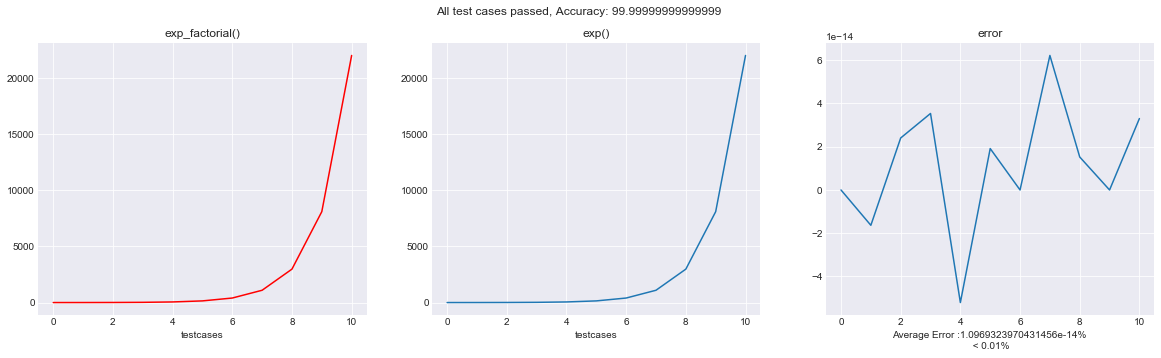

In [52]:
utils.theSeenAndTheUnseenTest(exp_factorial, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [53]:
# Runtime for exp_factorial
expfactorial_time = utils.find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_factorial)

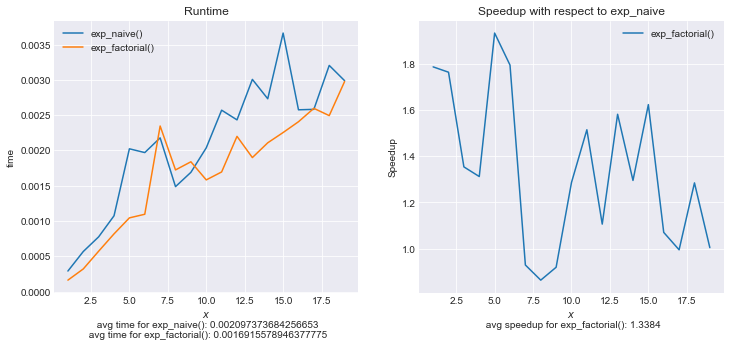

In [54]:
utils.plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expfactorial_time, exp_factorial)
         )

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup |
|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| -|
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$|
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$|
| Calculating Factorial | - | - | $0.2ms$ | $1\times$|
|All optimzations| $61 \mu s$|$200 \times$|

***

## Case 4: Further Optimization

Till now I was calculating the numerator and the denominator separately and every iteration and then dividing them. <br>$i.e., \frac{a\cdot a\cdot a ...}{1\cdot2\cdot3...}$
<p>The numerator and denominator go on increasing in magnitude at every iteration and then computation is done on these two numbers.
<br>
Instead of calculating terms this way I can do the following <br><br>$\frac{k}{i}$<br><br>$(\frac{k}{i})\cdot\frac{k}{i+1}$<br><br>$(\frac{k}{i}\cdot\frac{k}{i+1})\cdot\frac{k}{i+2}$<br><br>$\dots$<br>

![title](img/triCal.png)

In [55]:
def exp_power_factorial(x):
    '''
    exp with factorial optimization
    '''
    e = 1
    t = 1
    term = 1
    fact = 1
    i = 1 
    t1 = 1
    t2 = 0
    while t1 != t2:
        t = t*x / i
        e += t
        i = i + 1
        t2 = t1
        t1 = e
    return e, i

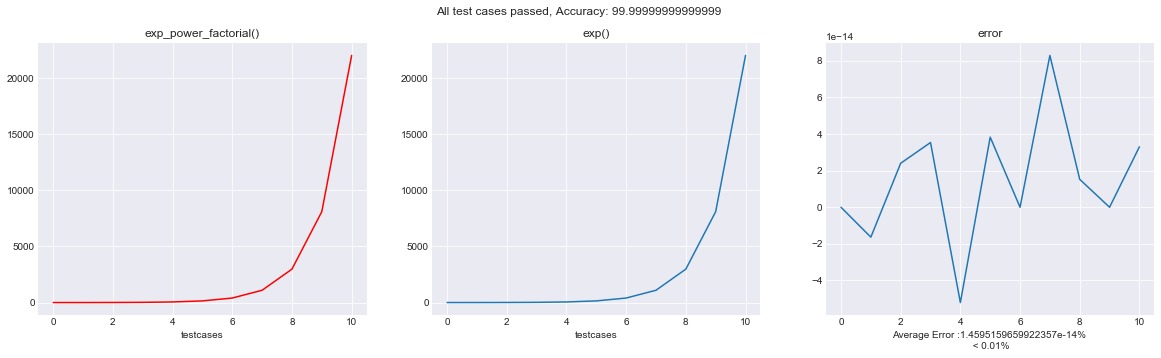

In [56]:
utils.theSeenAndTheUnseenTest(exp_power_factorial, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [57]:
# Runtime for exp_power_factorial
exppowerfactorial_time = utils.find_time(np.linspace(1, 20, num = 19, endpoint = False), exp_power_factorial)

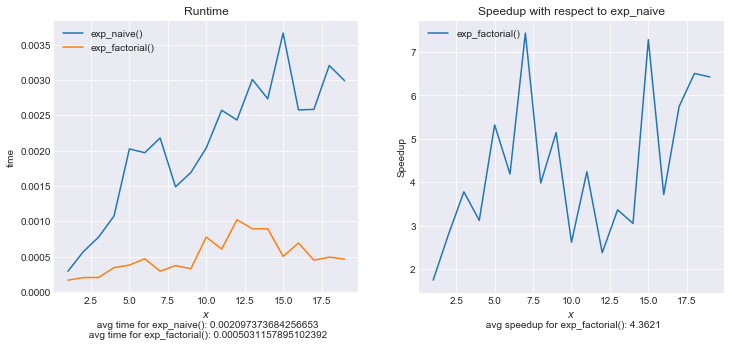

In [58]:
utils.plot_time(np.linspace(1, 20, num = 19, endpoint = False), True,
          first = (expnaive_time, exp_naive),
          second = (exppowerfactorial_time, exp_factorial)
         )

### Speedup of $4\times$
<p>
    
| Optimization | Geometric Series   | Speed Up | Exponential | Speedup |
|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| -|
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$|
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$|
|All optimzations| $61 \mu s$|$200 \times$|

____________________________

## Case 5
![title](img/triall.png)

In [59]:
def exp_allopts(x):
    '''
    Exp with all optimization cases 
    '''
    e = 1
    t = 1
    i = 1 
    term = 1
    fact = 1
    actual = math.exp(x)
    check = actual * (1  - 0.0001)
    while e < check :
        t = t*x/i
        e += t
        i = i + 1
    return e, i + 1

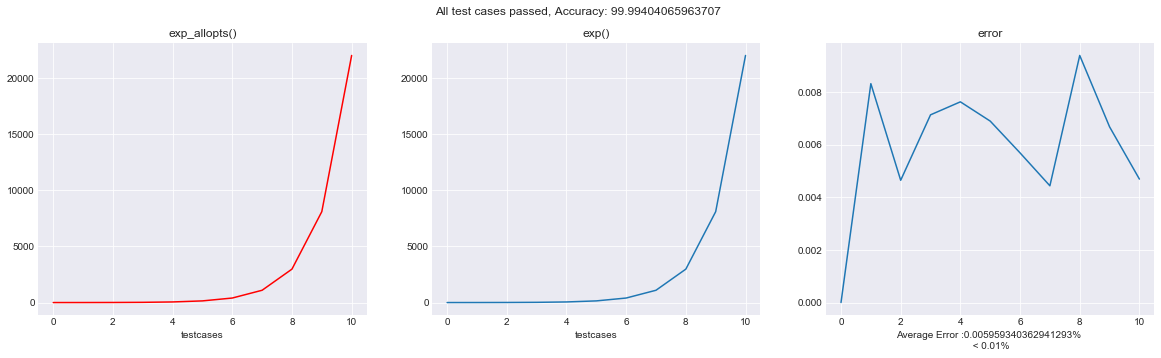

In [60]:
utils.theSeenAndTheUnseenTest(exp_allopts, math.exp, np.linspace(0, 10, num = 11, endpoint = True))

In [61]:
# Runtime for all opts
expfurtheropt_time = utils.find_time( np.linspace(1, 20, num = 19, endpoint = False), exp_allopts)

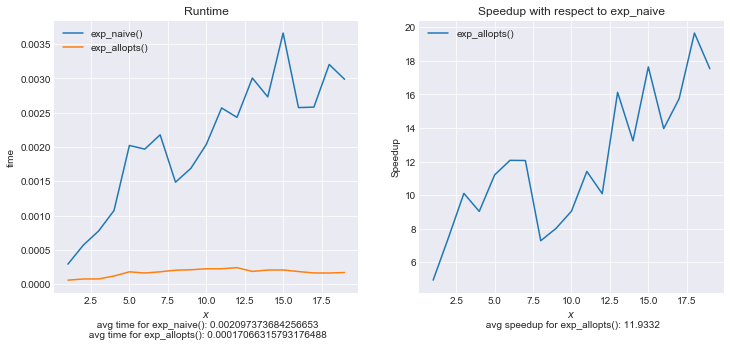

In [62]:
utils.plot_time(np.linspace(1, 20, num = 19, endpoint = False), True, 
          first = (expnaive_time, exp_naive),
          second = (expfurtheropt_time, exp_allopts))

#### Speedup of $7\times$ compared to Naive implementation !

| Optimization | Geometric Series   | Speed Up | Exponential | Speedup |
|------|------|------|------|------|
|   Naive  |$13 ms$| - |$1.9ms$| -|
| Iterations | $100\mu s$ | $100\times$|$0.62ms$|$3\times$|
| Calculating Power | $5.9 ms$ | $2\times$|$2ms$ | $1\times$|
| Calculating Factorial | - | - | $0.4ms$ | $1\times$|
| Calculation | - | - | $0.4ms$ | $4\times$|
|All optimzations| $61 \mu s$|$200 \times$| $0.12ms$ | $14\times$|

***
